In [4]:
import geopandas as gpd
import pandas as pd
import shapely
import pyproj
from geopandas.tools import sjoin
from shapely.geometry import Point, LineString
from math import radians, sin, cos, sqrt, atan2, asin, atan

print("All packages are working!")


All packages are working!


In [2]:
pd.reset_option("all")

C:\Users\Admin\AppData\Local\Temp\ipykernel_19208\3365680546.py:1: FutureWarning: data_manager option is deprecated and will be removed in a future version. Only the BlockManager will be available.
  pd.reset_option("all")
C:\Users\Admin\AppData\Local\Temp\ipykernel_19208\3365680546.py:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option("all")


### GPS truck ‡∏†‡∏≤‡∏Ñ‡∏Å‡∏•‡∏≤‡∏á

![image-2.png](attachment:image-2.png)

In [5]:
df = pd.read_parquet(r"D:\Decarbonization Project\CleanedData\cleaned_merged_truckdata.parquet")


In [4]:
df.head()

unitid               utc_ts        lat         lon  \
0  00300170000000T015820451233  2024-10-31 23:58:35  14.373698  100.021311   
1  00300170000000T015820710404  2024-10-31 23:58:14  13.779333  100.686003   
2  00300170000000T015820731682  2024-10-31 23:58:48  13.702786  100.822846   
3  00300170000000T015830332337  2024-10-31 23:58:55  13.028070  100.936436   
4  00300170000000T015830332421  2024-10-31 23:58:38  12.750050  101.178588   

   speed  typecode  
0      0         7  
1      0         7  
2      0         7  
3      0         6  
4      0         6

In [5]:
df_over_speed = df[df['speed'] >= 80]


In [ ]:
df_over_speed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342291 entries, 124 to 102640906
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   unitid    342291 non-null  object 
 1   utc_ts    342291 non-null  object 
 2   lat       342291 non-null  float64
 3   lon       342291 non-null  float64
 4   speed     342291 non-null  int64  
 5   typecode  342291 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 18.3+ MB


In [7]:
sample_df = df.sample(frac=0.3, random_state=42)
sample_df

unitid               utc_ts        lat  \
62929244   040000400000000143200384225  2024-11-01 12:45:42  13.078635   
41890055   114000400000868825064297824  2024-11-01 08:05:44  14.147753   
29076813   001000800000000115870118537  2024-11-01 05:37:55  14.291507   
19051243   104000100000016002050031803  2024-11-01 03:46:24  12.680158   
58995614   195000100000868998037481484  2024-11-01 11:46:55  14.104495   
...                                ...                  ...        ...   
100387482  195000600000359857084200211  2024-11-01 23:25:34  13.780060   
13793386   001001200000010148600000024  2024-11-01 02:49:11  13.075659   
51678851   003000900000000011975002910  2024-11-01 10:04:46  13.779892   
66128872   084000400000000242181259045  2024-11-01 13:35:12  13.561345   
101325386  195000100000867747070979248  2024-11-01 23:39:18  13.227383   

                  lon  speed  typecode  
62929244   100.990330      0         7  
41890055   100.643235      0         7  
29076813   100.819930     43         7  
19051243   101.122237      1         7  
58995614   100.632605      0         7  
...               ...    ...       ...  
100387482  100.216490      0         8  
13793386   100.927055     33         7  
51678851   100.364826      0         7  
66128872   100.586117      0         7  
101325386  101.004443      0         7  

[30792424 rows x 6 columns]

In [6]:
# Step 2: Transform coordinates to a NumPy array
coordinates_array = df_over_speed[['lat', 'lon']].to_numpy()
print("Coordinates as Array:")
print(coordinates_array)

# Step 3: Create Point geometries from lat/lon
geometry = [Point(xy) for xy in zip(df_over_speed['lon'], df_over_speed['lat'])]

# Step 4: Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(df_over_speed, crs="EPSG:4326", geometry=geometry)  # EPSG:4326 is WGS 84 (latitude/longitude)

# Step 5: (Optional) Transform CRS to UTM (e.g., EPSG:32647 for WGS 84 UTM Zone 47N)
gdf_utm = gdf.to_crs("EPSG:32647")  # Change to your desired CRS

# Step 6: Print results
print("GeoDataFrame with WGS 84:")
print(gdf.head())
print("\nGeoDataFrame with UTM (EPSG:32647):")
print(gdf_utm.head())

traj = gdf_utm['geometry'].to_numpy()
traj
gdf_utm


Coordinates as Array:
[[ 14.33315  100.84963 ]
 [ 13.757278 101.39932 ]
 [ 12.831681 101.127295]
 ...
 [ 13.628111 100.420828]
 [ 14.367187 100.878426]
 [ 13.850682 100.448592]]
GeoDataFrame with WGS 84:
                           unitid                      utc_ts        lat  \
124   093000100000000013300000112         2024-10-31 23:59:02  14.333150   
346   001000800000000114940103124         2024-10-31 23:59:35  13.757278   
390   043001300000000MTG01D000445  2024-10-31 23:59:46.046000  12.831681   
855   1200003000000000000L1000876         2024-10-31 23:59:50  14.329225   
1233  001001200000011288700000001         2024-10-31 23:59:58  13.106915   

             lon  speed  typecode                    geometry  
124   100.849630     80         5  POINT (100.84963 14.33315)  
346   101.399320     81         7  POINT (101.39932 13.75728)  
390   101.127295     91         8   POINT (101.1273 12.83168)  
855   100.613056     81         8  POINT (100.61306 14.32922)  
1233  101.166890   

unitid                      utc_ts        lat  \
124        093000100000000013300000112         2024-10-31 23:59:02  14.333150   
346        001000800000000114940103124         2024-10-31 23:59:35  13.757278   
390        043001300000000MTG01D000445  2024-10-31 23:59:46.046000  12.831681   
855        1200003000000000000L1000876         2024-10-31 23:59:50  14.329225   
1233       001001200000011288700000001         2024-10-31 23:59:58  13.106915   
...                                ...                         ...        ...   
102640058  006001600000864606045851051         2024-11-01 23:59:32  14.423490   
102640568  00300180000000T015820821655         2024-11-01 23:57:53  13.702709   
102640586  00300180000000T015830851155         2024-11-01 23:57:52  13.628111   
102640634  003000900000000011970900368         2024-11-01 23:58:54  14.367187   
102640906  007000600000000TU6202250043         2024-11-01 23:59:43  13.850682   

                  lon  speed  typecode                        geometry  
124        100.849630     80         5  POINT (699482.486 1585368.861)  
346        101.399320     81         7  POINT (759441.779 1522175.105)  
390        101.127295     91         8  POINT (730889.381 1419474.327)  
855        100.613056     81         8  POINT (673964.628 1584743.639)  
1233       101.166890     80         8  POINT (734930.096 1449966.861)  
...               ...    ...       ...                             ...  
102640058  100.893830     80         5  POINT (704168.889 1595403.729)  
102640568  100.406672     83         8   POINT (652114.51 1515290.193)  
102640586  100.420828     84         6  POINT (653693.945 1507046.931)  
102640634  100.878426     93         8  POINT (702558.494 1589160.111)  
102640906  100.448592     91         9   POINT (656549.922 1531686.41)  

[342291 rows x 7 columns]

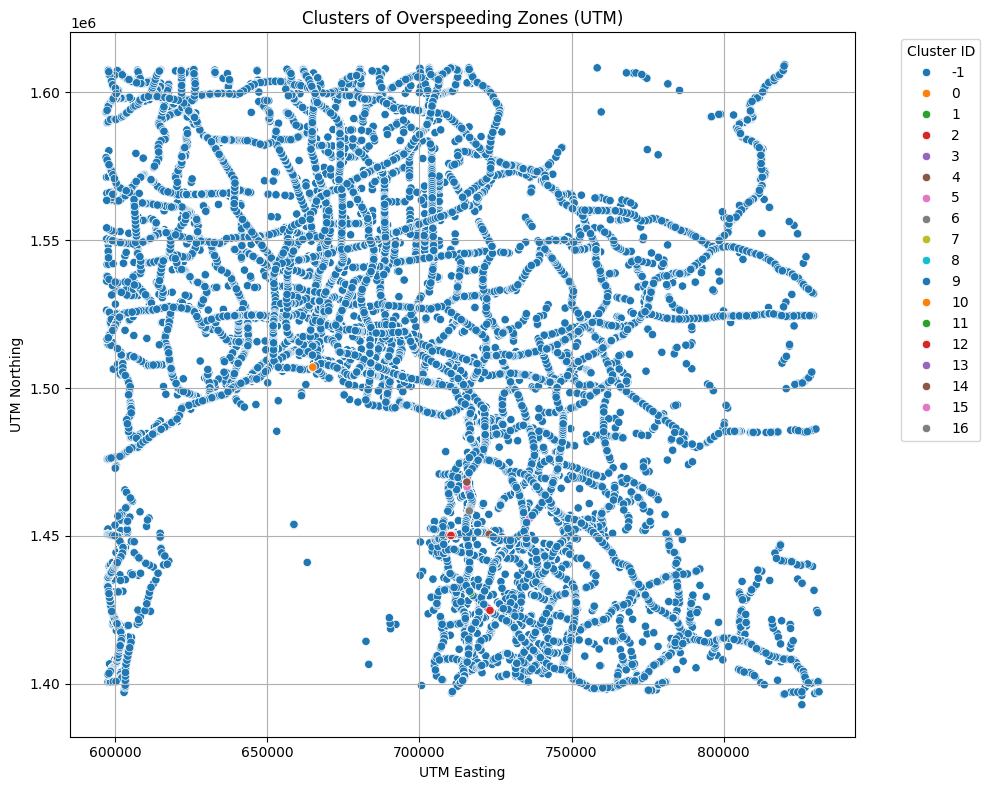

üìå Overspeeding ‡∏à‡∏∏‡∏î‡∏ó‡∏µ‡πà‡∏û‡∏ö‡πÉ‡∏ô‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏Ñ‡∏•‡∏±‡∏™‡πÄ‡∏ï‡∏≠‡∏£‡πå:
cluster
-1     331850
 6       1462
 0       1443
 2       1015
 3        846
 13       653
 1        647
 4        558
 7        512
 9        489
 14       459
 12       454
 5        369
 15       350
 11       340
 10       337
 8        268
 16       239
Name: count, dtype: int64


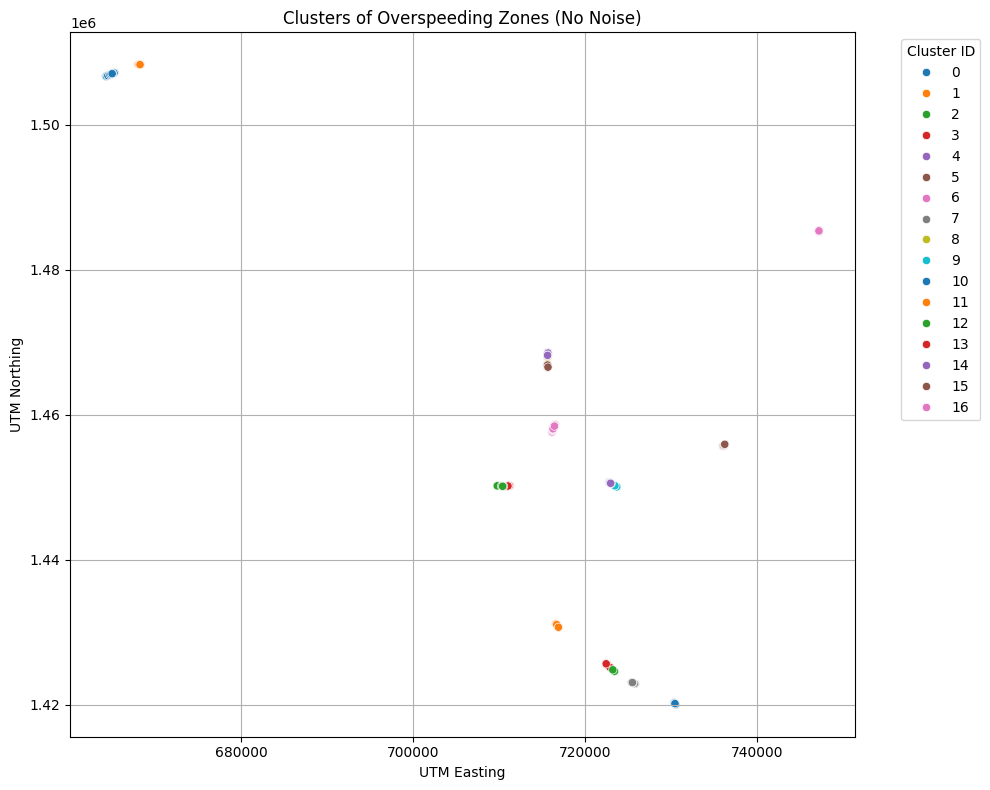

üìå Overspeeding ‡∏à‡∏∏‡∏î‡∏ó‡∏µ‡πà‡∏û‡∏ö‡πÉ‡∏ô‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏Ñ‡∏•‡∏±‡∏™‡πÄ‡∏ï‡∏≠‡∏£‡πå (‡∏´‡∏•‡∏±‡∏á‡∏à‡∏≤‡∏Å‡∏Å‡∏£‡∏≠‡∏á Noise):
cluster
6     1462
0     1443
2     1015
3      846
13     653
1      647
4      558
7      512
9      489
14     459
12     454
5      369
15     350
11     340
10     337
8      268
16     239
Name: count, dtype: int64


In [7]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
#import seaborn as plt
import seaborn as sns
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# ===== 1. ‡∏Å‡∏£‡∏≠‡∏á‡πÄ‡∏â‡∏û‡∏≤‡∏∞‡∏à‡∏∏‡∏î‡∏ó‡∏µ‡πà‡∏Ç‡∏±‡∏ö‡πÄ‡∏£‡πá‡∏ß‡πÄ‡∏Å‡∏¥‡∏ô 80 km/h =====
overspeed_df = gdf_utm

# ===== 2. ‡πÄ‡∏ï‡∏£‡∏µ‡∏¢‡∏°‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏û‡∏¥‡∏Å‡∏±‡∏î UTM (‡πÑ‡∏°‡πà‡πÉ‡∏ä‡πâ lat/lon ‡πÄ‡∏û‡∏£‡∏≤‡∏∞ UTM ‡πÄ‡∏õ‡πá‡∏ô metric ‡πÅ‡∏•‡πâ‡∏ß) =====
coords = overspeed_df.geometry.apply(lambda p: (p.x, p.y)).tolist()

# ===== 3. Cluster ‡∏î‡πâ‡∏ß‡∏¢ DBSCAN =====
# eps=100 (‡πÄ‡∏°‡∏ï‡∏£), min_samples=3 ‡∏à‡∏∏‡∏î‡πÉ‡∏Å‡∏•‡πâ‡∏Å‡∏±‡∏ô‡∏à‡∏∂‡∏á‡πÄ‡∏õ‡πá‡∏ô‡∏Å‡∏•‡∏∏‡πà‡∏°
db = DBSCAN(eps=100, min_samples=200).fit(coords)
overspeed_df['cluster'] = db.labels_

# ===== 4. ‡πÅ‡∏™‡∏î‡∏á‡∏ú‡∏•‡∏ö‡∏ô‡∏Å‡∏£‡∏≤‡∏ü =====
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=overspeed_df.geometry.x,
    y=overspeed_df.geometry.y,
    hue=overspeed_df['cluster'],
    palette='tab10',
    legend='full'
)
plt.title('Clusters of Overspeeding Zones (UTM)')
plt.xlabel('UTM Easting')
plt.ylabel('UTM Northing')
plt.grid(True)
plt.legend(title='Cluster ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ===== 5. ‡∏™‡∏£‡∏∏‡∏õ‡∏ú‡∏• =====
print("üìå Overspeeding ‡∏à‡∏∏‡∏î‡∏ó‡∏µ‡πà‡∏û‡∏ö‡πÉ‡∏ô‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏Ñ‡∏•‡∏±‡∏™‡πÄ‡∏ï‡∏≠‡∏£‡πå:")
print(overspeed_df['cluster'].value_counts())

# ===== 6. ‡∏Å‡∏£‡∏≠‡∏á Noise ‡∏≠‡∏≠‡∏Å‡∏à‡∏≤‡∏Å‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• =====
no_noise_df = overspeed_df[overspeed_df['cluster'] != -1]

# ===== 7. ‡πÅ‡∏™‡∏î‡∏á‡∏ú‡∏•‡∏Å‡∏£‡∏≤‡∏ü‡πÉ‡∏´‡∏°‡πà‡∏ó‡∏µ‡πà‡πÑ‡∏°‡πà‡∏°‡∏µ Noise =====
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=no_noise_df.geometry.x,
    y=no_noise_df.geometry.y,
    hue=no_noise_df['cluster'],
    palette='tab10',
    legend='full'
)
plt.title('Clusters of Overspeeding Zones (No Noise)')
plt.xlabel('UTM Easting')
plt.ylabel('UTM Northing')
plt.grid(True)
plt.legend(title='Cluster ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ===== 8. ‡∏™‡∏£‡∏∏‡∏õ‡∏ú‡∏•‡∏´‡∏•‡∏±‡∏á‡∏à‡∏≤‡∏Å‡∏Å‡∏£‡∏≠‡∏á Noise =====
print("üìå Overspeeding ‡∏à‡∏∏‡∏î‡∏ó‡∏µ‡πà‡∏û‡∏ö‡πÉ‡∏ô‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏Ñ‡∏•‡∏±‡∏™‡πÄ‡∏ï‡∏≠‡∏£‡πå (‡∏´‡∏•‡∏±‡∏á‡∏à‡∏≤‡∏Å‡∏Å‡∏£‡∏≠‡∏á Noise):")
print(no_noise_df['cluster'].value_counts())




In [8]:
highspeed_cluster_df = no_noise_df
highspeed_cluster_df

unitid               utc_ts        lat  \
22419      015001300000865851039123096  2024-10-31 23:58:40  13.625083   
45677      001001300000010139500000154  2024-11-01 00:00:04  12.936355   
68576      00300180000000T015840910459  2024-10-31 23:58:45  13.110623   
83797      008000700000000000232290056  2024-11-01 00:00:04  12.887109   
87408      174000100000000000000002542  2024-11-01 00:00:30  13.626703   
...                                ...                  ...        ...   
102597425  015001800000000080082343006  2024-11-01 23:57:55  13.113077   
102608633  035000100000000000JSIAM3024  2024-11-01 23:58:46  13.273130   
102621088  001000800000011339400000002  2024-11-01 23:59:10  12.880428   
102626205  036000500000864352048675664  2024-11-01 23:58:47  13.184780   
102633089  013000500000864352044143774  2024-11-01 23:59:39  13.627671   

                  lon  speed  typecode                        geometry  \
22419      100.519848     85         8  POINT (664409.451 1506776.784)   
45677      100.997643     80         7  POINT (716721.972 1430943.518)   
68576      100.938701     82         7  POINT (710178.096 1450175.966)   
83797      101.050682     85         7  POINT (722521.908 1425540.009)   
87408      100.523312     87         7   POINT (664783.046 1506958.34)   
...               ...    ...       ...                             ...   
102597425  101.056510     84         6  POINT (722952.585 1450548.554)   
102608633  100.990200     81         8  POINT (715620.603 1468200.506)   
102621088  101.056930     80         8  POINT (723206.069 1424806.181)   
102626205  100.996850     82         8  POINT (716419.333 1458430.448)   
102633089  100.525291     84         7   POINT (664996.54 1507066.737)   

           cluster  
22419            0  
45677            1  
68576            2  
83797            3  
87408            0  
...            ...  
102597425       14  
102608633        4  
102621088       12  
102626205        6  
102633089        0  

[10441 rows x 8 columns]

In [19]:

# Path to your shapefile
file_path = r"D:\Decarbonization Project\road1"
polyline_data = gpd.read_file(file_path,encoding='latin1')

# Rename columns using their current index or name
polyline_data.rename(columns={
    polyline_data.columns[2]: 'road_number',  # Rename column index 3
    polyline_data.columns[3]: 'control',
    polyline_data.columns[5]: 'km_start',      # Rename column index 4
    polyline_data.columns[6]: 'km_end',      # Rename column index 4
    polyline_data.columns[7]: 'distance'     # Rename column index 8
}, inplace=True)


# Verify the changes
columns_to_keep = [0, 1, 2, 3,5,6, 7, -1]  # Use -1 for the last column
polyline_data = polyline_data.iloc[:, columns_to_keep]

# Verify the updated DataFrame
polyline_data.head()
polyline_data.info
polyline_data

id section_pa road_number control km_start   km_end distance  \
0      305       5553          36     101    0+000   10+000       10   
1     2320        238        3510     100    0+000   25+921   25.921   
2     2189      10236        3333     102   18+462   34+167   15.705   
3      311        965          37     200   23+482   47+468   23.986   
4     2706      10121        4110     101   48+478   48+512    0.034   
...    ...        ...         ...     ...      ...      ...      ...   
2961   133      11621           6     200   71+250   86+600    15.35   
2962   147       6325           7     102    0+000    0+512    0.512   
2963   640      11502         290     102   93+196  110+736    17.54   
2964  1317       5001        1400     100    0+000    4+829    4.829   
2965    77      11321           3     601  287+889  312+000   24.111   

                                               geometry  
0     LINESTRING (709309.55 1438227.317, 709491.064 ...  
1     LINESTRING (570954.517 1469333.105, 570966.824...  
2     LINESTRING (705354.224 1646180.743, 705354.478...  
3     LINESTRING (593264.76 1395498.21, 593269.299 1...  
4     LINESTRING (540272.057 917613.113, 540274.013 ...  
...                                                 ...  
2961  LINESTRING (725956.272 1616062.127, 725991.824...  
2962  LINESTRING (690372.704 1518626.122, 690372.693...  
2963  LINESTRING (829006.967 1642440.253, 828992.601...  
2964  LINESTRING (513541.151 1866859.686, 513513.795...  
2965  LINESTRING (806232.692 1414503.685, 806236.588...  

[2966 rows x 8 columns]

In [10]:
matched_gps_route = gpd.sjoin_nearest(highspeed_cluster_df, polyline_data, distance_col="dist") #max_distance = 
matched_gps_route.reset_index(drop=True, inplace=True)
matched_gps_route

unitid               utc_ts        lat  \
0      015001300000865851039123096  2024-10-31 23:58:40  13.625083   
1      001001300000010139500000154  2024-11-01 00:00:04  12.936355   
2      00300180000000T015840910459  2024-10-31 23:58:45  13.110623   
3      008000700000000000232290056  2024-11-01 00:00:04  12.887109   
4      174000100000000000000002542  2024-11-01 00:00:30  13.626703   
...                            ...                  ...        ...   
10436  015001800000000080082343006  2024-11-01 23:57:55  13.113077   
10437  035000100000000000JSIAM3024  2024-11-01 23:58:46  13.273130   
10438  001000800000011339400000002  2024-11-01 23:59:10  12.880428   
10439  036000500000864352048675664  2024-11-01 23:58:47  13.184780   
10440  013000500000864352044143774  2024-11-01 23:59:39  13.627671   

              lon  speed  typecode                        geometry  cluster  \
0      100.519848     85         8  POINT (664409.451 1506776.784)        0   
1      100.997643     80         7  POINT (716721.972 1430943.518)        1   
2      100.938701     82         7  POINT (710178.096 1450175.966)        2   
3      101.050682     85         7  POINT (722521.908 1425540.009)        3   
4      100.523312     87         7   POINT (664783.046 1506958.34)        0   
...           ...    ...       ...                             ...      ...   
10436  101.056510     84         6  POINT (722952.585 1450548.554)       14   
10437  100.990200     81         8  POINT (715620.603 1468200.506)        4   
10438  101.056930     80         8  POINT (723206.069 1424806.181)       12   
10439  100.996850     82         8  POINT (716419.333 1458430.448)        6   
10440  100.525291     84         7   POINT (664996.54 1507066.737)        0   

       index_right    id section_pa road_number control km_start   km_end  \
0              489  2541       6179        3902     101    0+000   19+972   
1             2304   306      10216          36     102   10+000   21+592   
2              385   154       6308           7     109    0+000    8+091   
3             2304   306      10216          36     102   10+000   21+592   
4              296   157       6315           9     101    0+000   19+972   
...            ...   ...        ...         ...     ...      ...      ...   
10436         2552   738       5600         331     104    0+000   16+542   
10437           25   150      11572           7     105   77+800  110+000   
10438         2304   306      10216          36     102   10+000   21+592   
10439           25   150      11572           7     105   77+800  110+000   
10440          296   157       6315           9     101    0+000   19+972   

      distance        dist  
0       19.972    6.059064  
1       11.592   15.879858  
2        8.091    6.093312  
3       11.592   11.499530  
4       19.972  177.006933  
...        ...         ...  
10436   16.542    4.766585  
10437     32.2   15.189355  
10438   11.592   13.471411  
10439     32.2   17.196818  
10440   19.972    6.406978  

[10441 rows x 17 columns]

In [28]:
grouped_data = matched_gps_route.groupby('cluster').agg({
    'id': lambda x: sorted(set(map(str, x))),
    'section_pa': lambda x: sorted(set(map(str, x))),
    'road_number': lambda x: sorted(set(map(str, x))),
    'control': lambda x: sorted(set(map(str, x))),
}).reset_index()
grouped_data

cluster                 id           section_pa      road_number  \
0         0  [157, 2510, 2541]   [5900, 6179, 6315]  [3901, 3902, 9]   
1         1              [306]              [10216]             [36]   
2         2  [154, 2404, 2406]   [5601, 6134, 6308]  [3608, 3611, 7]   
3         3              [306]              [10216]             [36]   
4         4  [150, 2467, 2507]  [11572, 6203, 6207]  [3701, 3702, 7]   
5         5  [150, 2467, 2507]  [11572, 6203, 6207]  [3701, 3702, 7]   
6         6  [150, 2467, 2507]  [11572, 6203, 6207]  [3701, 3702, 7]   
7         7              [307]               [5517]             [36]   
8         8  [150, 2467, 2507]  [11572, 6203, 6207]  [3701, 3702, 7]   
9         9              [738]               [5600]            [331]   
10       10              [307]               [5517]             [36]   
11       11             [1983]               [2121]           [3113]   
12       12              [306]              [10216]             [36]   
13       13  [154, 2404, 2406]   [5601, 6134, 6308]  [3608, 3611, 7]   
14       14              [738]               [5600]            [331]   
15       15              [737]               [6114]            [331]   
16       16              [740]               [5550]            [331]   

       control  
0        [101]  
1        [102]  
2   [100, 109]  
3        [102]  
4   [105, 400]  
5   [105, 400]  
6   [105, 400]  
7        [201]  
8   [105, 400]  
9        [104]  
10       [201]  
11       [100]  
12       [102]  
13  [100, 109]  
14       [104]  
15       [103]  
16       [202]

0                   [157, 2510, 2541]	

1 3  12 ‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô‡∏Å‡∏±‡∏ô     [306]	

4 5 6 ‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô‡∏Å‡∏±‡∏ô       [150, 2467, 2507]

‡∏∂7 10 ‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô‡∏Å‡∏±‡∏ô        [307]	

‡∏∂11	                  [1983]	

2,13  ‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô‡∏Å‡∏±‡∏ô       [154, 2404, 2406]	

14	                [738]	

15                  [737]	

16                  [740]	

‡∏™‡∏£‡∏∏‡∏õ‡πÅ‡∏•‡πâ‡∏ß ‡∏û‡∏∑‡πâ‡∏ô‡∏ó‡∏µ‡πà‡∏ñ‡∏ô‡∏ô‡∏ó‡∏µ‡πà‡∏£‡∏ñ‡∏ö‡∏£‡∏£‡∏ó‡∏∏‡∏Å‡∏Ç‡∏±‡∏ö‡∏ú‡∏¥‡∏î‡∏Å‡∏§‡∏´‡∏°‡∏≤‡∏¢‡∏Ñ‡∏∑‡∏≠ ‡πÅ‡∏ö‡πà‡∏á‡πÄ‡∏õ‡πá‡∏ô  9‡∏Å‡∏•‡∏∏‡πà‡∏°  ‡πÅ‡∏°‡πâ‡∏ß‡πà‡∏≤ DBSCAN‡∏à‡∏∞‡πÅ‡∏ö‡πà‡∏á‡πÄ‡∏õ‡πá‡∏ô17‡∏Å‡∏•‡∏∏‡πà‡∏° ‡πÅ‡∏ï‡πà‡∏à‡∏≤‡∏Å‡∏Å‡∏≤‡∏£Validate ‡∏û‡∏ö‡∏ß‡πà‡∏≤‡∏°‡∏µ‡∏ö‡∏≤‡∏á‡∏Å‡∏•‡∏∏‡πà‡∏°‡∏ó‡∏µ‡πà‡πÉ‡∏ä‡πâ‡∏ñ‡∏ô‡∏ô‡πÄ‡∏™‡πâ‡∏ô‡πÄ‡∏î‡∏µ‡∏¢‡∏ß‡∏Å‡∏±‡∏ô

# ‡∏à‡∏∏‡∏î‡∏ó‡∏µ‡πà‡∏£‡∏ñ‡∏ï‡∏¥‡∏î

In [ ]:
sample_df

In [11]:
low_speed = sample_df[(sample_df['speed'] > 0) & (sample_df['speed'] < 5)]
low_speed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 580068 entries, 19051243 to 32415732
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   unitid    580068 non-null  object 
 1   utc_ts    580068 non-null  object 
 2   lat       580068 non-null  float64
 3   lon       580068 non-null  float64
 4   speed     580068 non-null  int64  
 5   typecode  580068 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 31.0+ MB


In [12]:
# Step 2: Transform coordinates to a NumPy array
coordinates_array = low_speed[['lat', 'lon']].to_numpy()
print("Coordinates as Array:")
print(coordinates_array)

# Step 3: Create Point geometries from lat/lon
geometry = [Point(xy) for xy in zip(low_speed['lon'], low_speed['lat'])]

# Step 4: Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(low_speed, crs="EPSG:4326", geometry=geometry)  # EPSG:4326 is WGS 84 (latitude/longitude)

# Step 5: (Optional) Transform CRS to UTM (e.g., EPSG:32647 for WGS 84 UTM Zone 47N)
gdf_utm = gdf.to_crs("EPSG:32647")  # Change to your desired CRS

# Step 6: Print results
print("GeoDataFrame with WGS 84:")
print(gdf.head())
print("\nGeoDataFrame with UTM (EPSG:32647):")
print(gdf_utm.head())

traj = gdf_utm['geometry'].to_numpy()
traj
gdf_utm


Coordinates as Array:
[[ 12.68015833 101.12223667]
 [ 13.976773   100.585388  ]
 [ 13.741781   100.745502  ]
 ...
 [ 14.330081   100.502951  ]
 [ 13.672707   101.028639  ]
 [ 13.113537   101.015022  ]]
GeoDataFrame with WGS 84:
                               unitid               utc_ts        lat  \
19051243  104000100000016002050031803  2024-11-01 03:46:24  12.680158   
98683265  077000500000000007624413193  2024-11-01 22:58:48  13.976773   
35652384  0300006000000000FOX_003_082  2024-11-01 06:53:31  13.741781   
41878695  07500030000000000N882000011  2024-11-01 08:05:40  13.908210   
2881881   0300006000000000FOX_003_863  2024-11-01 00:39:01  14.203440   

                 lon  speed  typecode                    geometry  
19051243  101.122237      1         7  POINT (101.12224 12.68016)  
98683265  100.585388      1         7  POINT (100.58539 13.97677)  
35652384  100.745502      1         7   POINT (100.7455 13.74178)  
41878695  100.743950      1         6  POINT (100.74395 13.90

unitid               utc_ts        lat  \
19051243  104000100000016002050031803  2024-11-01 03:46:24  12.680158   
98683265  077000500000000007624413193  2024-11-01 22:58:48  13.976773   
35652384  0300006000000000FOX_003_082  2024-11-01 06:53:31  13.741781   
41878695  07500030000000000N882000011  2024-11-01 08:05:40  13.908210   
2881881   0300006000000000FOX_003_863  2024-11-01 00:39:01  14.203440   
...                               ...                  ...        ...   
52077560  0300006000000000FOX_003_122  2024-11-01 10:10:44  14.360974   
61735763  0070001000000TM5901136403M2  2024-11-01 12:26:25  13.691505   
57612951  013000200000868959031727553  2024-11-01 11:27:03  14.330081   
90281927  0300006000000000FOX_003_909  2024-11-01 20:38:35  13.672707   
32415732  192000120240316000750001972  2024-11-01 06:16:15  13.113537   

                 lon  speed  typecode                        geometry  
19051243  101.122237      1         7  POINT (730477.325 1402703.343)  
98683265  100.585388      1         7   POINT (671243.899 1545729.85)  
35652384  100.745502      1         7  POINT (688732.763 1519851.934)  
41878695  100.743950      1         6  POINT (688430.937 1538264.283)  
2881881   100.576350      1         7  POINT (670099.446 1570800.194)  
...              ...    ...       ...                             ...  
52077560  100.852680      1         7    POINT (699786.852 1588450.2)  
61735763  100.547318      2         6  POINT (667334.751 1514143.628)  
57612951  100.502951      4         8   POINT (662086.93 1584758.388)  
90281927  101.028639      1         8  POINT (719421.796 1512448.284)  
32415732  101.015022      2         8  POINT (718452.644 1450563.203)  

[580068 rows x 7 columns]

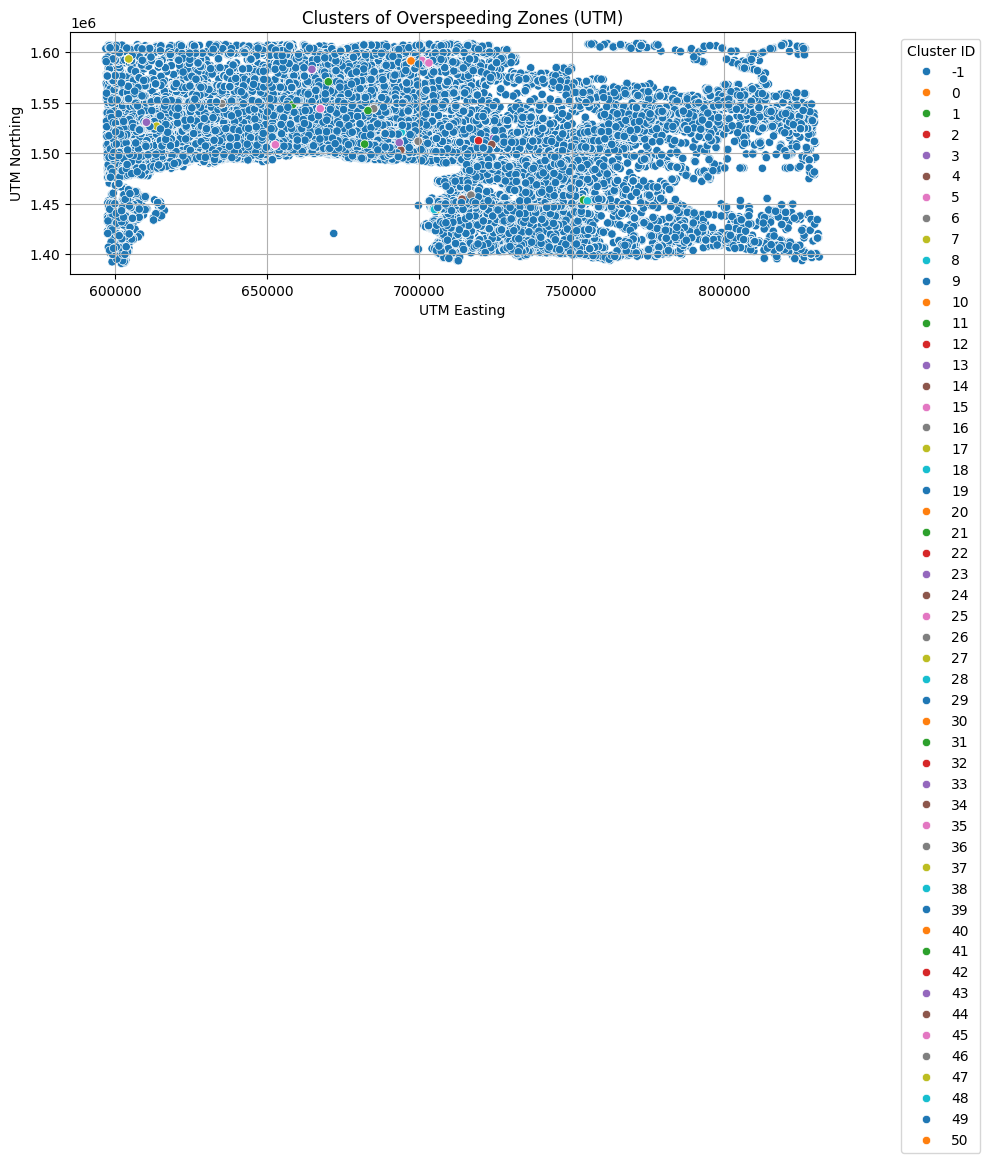

üìå lowspeeding ‡∏à‡∏∏‡∏î‡∏ó‡∏µ‡πà‡∏û‡∏ö‡πÉ‡∏ô‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏Ñ‡∏•‡∏±‡∏™‡πÄ‡∏ï‡∏≠‡∏£‡πå:
cluster
-1     509081
 13      8006
 0       4502
 16      3669
 5       2956
 22      2917
 2       2767
 3       2344
 25      2219
 36      2107
 12      1943
 21      1643
 35      1633
 26      1600
 31      1540
 42      1417
 14      1366
 32      1357
 9       1306
 40      1225
 7       1163
 30      1148
 38      1018
 45      1001
 27       986
 8        909
 28       889
 23       873
 24       835
 37       830
 46       822
 6        811
 17       796
 47       789
 39       779
 20       775
 15       771
 33       756
 4        745
 29       734
 1        715
 19       698
 44       646
 18       624
 48       591
 49       572
 10       562
 43       560
 50       525
 11       521
 41       519
 34       507
Name: count, dtype: int64


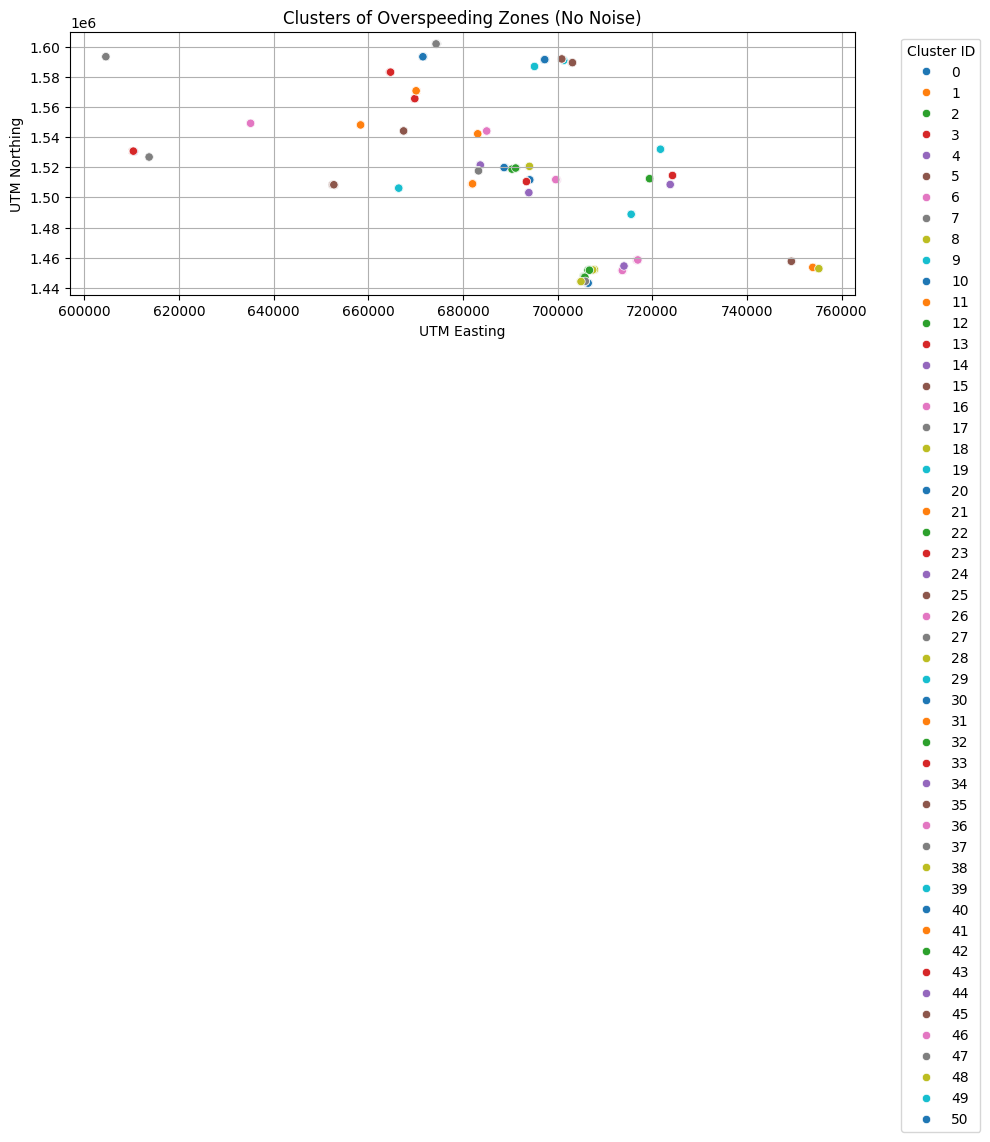

üìå lowspeeding ‡∏à‡∏∏‡∏î‡∏ó‡∏µ‡πà‡∏û‡∏ö‡πÉ‡∏ô‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏Ñ‡∏•‡∏±‡∏™‡πÄ‡∏ï‡∏≠‡∏£‡πå (‡∏´‡∏•‡∏±‡∏á‡∏à‡∏≤‡∏Å‡∏Å‡∏£‡∏≠‡∏á Noise):
cluster
13    8006
0     4502
16    3669
5     2956
22    2917
2     2767
3     2344
25    2219
36    2107
12    1943
21    1643
35    1633
26    1600
31    1540
42    1417
14    1366
32    1357
9     1306
40    1225
7     1163
30    1148
38    1018
45    1001
27     986
8      909
28     889
23     873
24     835
37     830
46     822
6      811
17     796
47     789
39     779
20     775
15     771
33     756
4      745
29     734
1      715
19     698
44     646
18     624
48     591
49     572
10     562
43     560
50     525
11     521
41     519
34     507
Name: count, dtype: int64


In [15]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
#import seaborn as plt
import seaborn as sns
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point


overspeed_df = gdf_utm

# ===== 2. ‡πÄ‡∏ï‡∏£‡∏µ‡∏¢‡∏°‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏û‡∏¥‡∏Å‡∏±‡∏î UTM (‡πÑ‡∏°‡πà‡πÉ‡∏ä‡πâ lat/lon ‡πÄ‡∏û‡∏£‡∏≤‡∏∞ UTM ‡πÄ‡∏õ‡πá‡∏ô metric ‡πÅ‡∏•‡πâ‡∏ß) =====
coords = overspeed_df.geometry.apply(lambda p: (p.x, p.y)).tolist()

# ===== 3. Cluster ‡∏î‡πâ‡∏ß‡∏¢ DBSCAN =====
# eps=100 (‡πÄ‡∏°‡∏ï‡∏£), min_samples=3 ‡∏à‡∏∏‡∏î‡πÉ‡∏Å‡∏•‡πâ‡∏Å‡∏±‡∏ô‡∏à‡∏∂‡∏á‡πÄ‡∏õ‡πá‡∏ô‡∏Å‡∏•‡∏∏‡πà‡∏°
db = DBSCAN(eps=100, min_samples=500).fit(coords)
overspeed_df['cluster'] = db.labels_

# ===== 4. ‡πÅ‡∏™‡∏î‡∏á‡∏ú‡∏•‡∏ö‡∏ô‡∏Å‡∏£‡∏≤‡∏ü =====
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=overspeed_df.geometry.x,
    y=overspeed_df.geometry.y,
    hue=overspeed_df['cluster'],
    palette='tab10',
    legend='full'
)
plt.title('Clusters of Overspeeding Zones (UTM)')
plt.xlabel('UTM Easting')
plt.ylabel('UTM Northing')
plt.grid(True)
plt.legend(title='Cluster ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ===== 5. ‡∏™‡∏£‡∏∏‡∏õ‡∏ú‡∏• =====
print("üìå lowspeeding ‡∏à‡∏∏‡∏î‡∏ó‡∏µ‡πà‡∏û‡∏ö‡πÉ‡∏ô‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏Ñ‡∏•‡∏±‡∏™‡πÄ‡∏ï‡∏≠‡∏£‡πå:")
print(overspeed_df['cluster'].value_counts())

# ===== 6. ‡∏Å‡∏£‡∏≠‡∏á Noise ‡∏≠‡∏≠‡∏Å‡∏à‡∏≤‡∏Å‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• =====
no_noise_df = overspeed_df[overspeed_df['cluster'] != -1]

# ===== 7. ‡πÅ‡∏™‡∏î‡∏á‡∏ú‡∏•‡∏Å‡∏£‡∏≤‡∏ü‡πÉ‡∏´‡∏°‡πà‡∏ó‡∏µ‡πà‡πÑ‡∏°‡πà‡∏°‡∏µ Noise =====
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=no_noise_df.geometry.x,
    y=no_noise_df.geometry.y,
    hue=no_noise_df['cluster'],
    palette='tab10',
    legend='full'
)
plt.title('Clusters of Overspeeding Zones (No Noise)')
plt.xlabel('UTM Easting')
plt.ylabel('UTM Northing')
plt.grid(True)
plt.legend(title='Cluster ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ===== 8. ‡∏™‡∏£‡∏∏‡∏õ‡∏ú‡∏•‡∏´‡∏•‡∏±‡∏á‡∏à‡∏≤‡∏Å‡∏Å‡∏£‡∏≠‡∏á Noise =====
print("üìå lowspeeding ‡∏à‡∏∏‡∏î‡∏ó‡∏µ‡πà‡∏û‡∏ö‡πÉ‡∏ô‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏Ñ‡∏•‡∏±‡∏™‡πÄ‡∏ï‡∏≠‡∏£‡πå (‡∏´‡∏•‡∏±‡∏á‡∏à‡∏≤‡∏Å‡∏Å‡∏£‡∏≠‡∏á Noise):")
print(no_noise_df['cluster'].value_counts())




In [16]:
low_cluster_df = no_noise_df
low_cluster_df

unitid               utc_ts        lat  \
35652384  0300006000000000FOX_003_082  2024-11-01 06:53:31  13.741781   
2881881   0300006000000000FOX_003_863  2024-11-01 00:39:01  14.203440   
89590535  174000100000000000000002121  2024-11-01 20:26:23  13.085868   
53875374  030000600000000FOX_002_2084  2024-11-01 10:34:38  13.741899   
31415474  0300006000000000FOX_002_591  2024-11-01 06:04:36  13.844255   
...                               ...                  ...        ...   
81534125  030000600000000FOX_002_1567  2024-11-01 17:59:35  14.388668   
97639285  0300006000000000FOX_003_543  2024-11-01 22:42:19  13.741641   
45797522  0300006000000000FOX_003_178  2024-11-01 08:52:15  13.459394   
84767622  150000200000863835028948490  2024-11-01 18:58:35  13.640530   
90281927  0300006000000000FOX_003_909  2024-11-01 20:38:35  13.672707   

                 lon  speed  typecode                        geometry  cluster  
35652384  100.745502      1         7  POINT (688732.763 1519851.934)        0  
2881881   100.576350      1         7  POINT (670099.446 1570800.194)        1  
89590535  100.895658      4         7  POINT (705530.736 1447401.619)        2  
53875374  100.745453      1         7  POINT (688727.369 1519864.951)        0  
31415474  100.021080      1         7  POINT (610346.287 1530737.087)        3  
...              ...    ...       ...                             ...      ...  
81534125  100.829633      1         7  POINT (697276.488 1591494.672)       30  
97639285  100.745065      1         7  POINT (688685.611 1519836.103)        0  
45797522  100.990957      1         6  POINT (715537.018 1488811.169)       39  
84767622  100.411920      4         7  POINT (652722.191 1508415.128)        5  
90281927  101.028639      1         8  POINT (719421.796 1512448.284)       12  

[70987 rows x 8 columns]

In [20]:
matched_gps_route = gpd.sjoin_nearest(low_cluster_df, polyline_data, distance_col="dist") #max_distance = 
matched_gps_route.reset_index(drop=True, inplace=True)
matched_gps_route

unitid               utc_ts        lat  \
0      0300006000000000FOX_003_082  2024-11-01 06:53:31  13.741781   
1      0300006000000000FOX_003_863  2024-11-01 00:39:01  14.203440   
2      0300006000000000FOX_003_863  2024-11-01 00:39:01  14.203440   
3      0300006000000000FOX_003_863  2024-11-01 00:39:01  14.203440   
4      0300006000000000FOX_003_863  2024-11-01 00:39:01  14.203440   
...                            ...                  ...        ...   
73127  030000600000000FOX_002_1567  2024-11-01 17:59:35  14.388668   
73128  0300006000000000FOX_003_543  2024-11-01 22:42:19  13.741641   
73129  0300006000000000FOX_003_178  2024-11-01 08:52:15  13.459394   
73130  150000200000863835028948490  2024-11-01 18:58:35  13.640530   
73131  0300006000000000FOX_003_909  2024-11-01 20:38:35  13.672707   

              lon  speed  typecode                        geometry  cluster  \
0      100.745502      1         7  POINT (688732.763 1519851.934)        0   
1      100.576350      1         7  POINT (670099.446 1570800.194)        1   
2      100.576350      1         7  POINT (670099.446 1570800.194)        1   
3      100.576350      1         7  POINT (670099.446 1570800.194)        1   
4      100.576350      1         7  POINT (670099.446 1570800.194)        1   
...           ...    ...       ...                             ...      ...   
73127  100.829633      1         7  POINT (697276.488 1591494.672)       30   
73128  100.745065      1         7  POINT (688685.611 1519836.103)        0   
73129  100.990957      1         6  POINT (715537.018 1488811.169)       39   
73130  100.411920      4         7  POINT (652722.191 1508415.128)        5   
73131  101.028639      1         8  POINT (719421.796 1512448.284)       12   

       index_right    id section_pa road_number control km_start  km_end  \
0             2764  1986       3968        3119     102    5+309  11+003   
1             1125  2160       3748        3309     100    0+000   6+000   
2             1122  2163       3748        3309     100    0+000   6+000   
3             1123  2162       3748        3309     100    0+000   6+000   
4             1124  2161       3748        3309     100    0+000   6+000   
...            ...   ...        ...         ...     ...      ...     ...   
73127         2900   136      11536           6     200   27+500  43+773   
73128         2764  1986       3968        3119     102    5+309  11+003   
73129          240   299       5548          34     300   52+900  58+855   
73130          489  2541       6179        3902     101    0+000  19+972   
73131         1018   698       5585         314     102    7+475  20+500   

      distance         dist  
0        5.694   114.489802  
1            6   434.155355  
2            6   434.155355  
3            6   434.155355  
4            6   434.155355  
...        ...          ...  
73127   16.273  1100.361092  
73128    5.694   161.721907  
73129    5.955   580.563880  
73130   19.972    14.013962  
73131   13.025  2393.955783  

[73132 rows x 17 columns]

In [21]:
grouped_data = matched_gps_route.groupby('cluster').agg({
    'id': lambda x: sorted(set(map(str, x))),
    'section_pa': lambda x: sorted(set(map(str, x))),
    'road_number': lambda x: sorted(set(map(str, x))),
    'control': lambda x: sorted(set(map(str, x))),
}).reset_index()
grouped_data

cluster                        id                section_pa  \
0         0                    [1986]                    [3968]   
1         1  [2160, 2161, 2162, 2163]                    [3748]   
2         2                      [71]                    [2320]   
3         3                     [712]                    [6327]   
4         4                    [2093]                    [3394]   
5         5    [157, 2510, 2541, 300]  [5535, 5900, 6179, 6315]   
6         6              [2533, 2560]              [2745, 2761]   
7         7                    [2287]                    [5413]   
8         8                    [2428]                    [2827]   
9         9                       [6]                   [11544]   
10       10                    [2475]                    [2686]   
11       11                     [768]                    [3792]   
12       12                     [698]                    [5585]   
13       13                     [784]                    [1703]   
14       14                     [712]                    [6327]   
15       15                     [768]                    [3792]   
16       16                     [778]                    [1436]   
17       17                     [164]                   [11576]   
18       18                     [768]                    [3792]   
19       19                     [652]                    [1382]   
20       20                    [1946]                    [5615]   
21       21                     [160]                   [10685]   
22       22                      [71]                    [2320]   
23       23                     [162]                    [5964]   
24       24                     [813]                    [5568]   
25       25                     [674]                    [3755]   
26       26                    [2481]                    [2688]   
27       27                      [71]                    [2320]   
28       28                      [71]                    [2320]   
29       29                     [130]                   [11376]   
30       30                     [136]                   [11536]   
31       31              [2540, 2571]              [6099, 6180]   
32       32          [147, 148, 2428]       [11568, 2827, 6325]   
33       33                     [818]                    [5478]   
34       34                    [2129]                   [10574]   
35       35                     [288]                    [5419]   
36       36                    [2467]                    [6207]   
37       37                      [87]                     [987]   
38       38                      [71]                    [2320]   
39       39                     [299]                    [5548]   
40       40                      [71]                    [2320]   
41       41                    [2167]                    [5051]   
42       42               [147, 2428]              [2827, 6325]   
43       43                     [659]                   [11509]   
44       44              [2535, 2570]            [10094, 10104]   
45       45                       [6]                   [11544]   
46       46                    [2406]                    [5601]   
47       47                    [2174]                    [5709]   
48       48                      [71]                    [2320]   
49       49              [2045, 2299]              [5557, 5571]   
50       50                      [71]                    [2320]   

            road_number          control  
0                [3119]            [102]  
1                [3309]            [100]  
2                   [3]            [402]  
3                 [321]            [101]  
4                [3241]            [101]  
5   [35, 3901, 3902, 9]       [100, 101]  
6          [3901, 3902]            [500]  
7                [3467]            [100]  
8                [3701]            [100]  
9                   [1]            [401]  
10               [3702]            [100]  
11 